# Import & Start Progs

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stats

In [6]:
# Define Action class
class Actions:
    def __init__(self, m, id):
        self.m = m
        self.mean = 0
        self.N = 0
        self.id = id
        self.vals = []
    # Choose a random action
    def choose(self):
        return np.random.randn() + self.m
    # Update the action-value estimate
    def inc_update(self, x):
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x
    def greedy(self):
        self.mean = self.m
    def update(self,x):
        self.N += 1
        self.vals.append(x)
        self.mean = stats.mean(self.vals)
    def print(self):
        print("\tArm", self.id,":\tM = ", self.m, "\tMean  = ", self.mean, "\tN = ", self.N)

# Greedy Approach

In [7]:
def greedy_experiment(m1, m2, m3, N):
    actions = [Actions(m1,1), Actions(m2,2), Actions(m3,3)]
    for a in actions:
        a.greedy()
    data = np.empty(N)  
    for i in range(N):
    # epsilon greedy
        p = np.random.random()
        j = np.argmax([a.mean for a in actions])
        x = actions[j].choose()
        actions[j].inc_update(x)
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    # plot moving average ctr
    plt.plot(cumulative_average, label='Average Reward')
    plt.plot(np.ones(N)*m1, label='Reward for Arm 1')
    plt.plot(np.ones(N)*m2, label='Reward for Arm 2')
    plt.plot(np.ones(N)*m3, label='Reward for Arm 3')
    plt.xscale('log')
    plt.xlabel('Number of Trials')
    plt.ylabel('Reward')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()    
    for a in actions:
        a.print()
    return cumulative_average

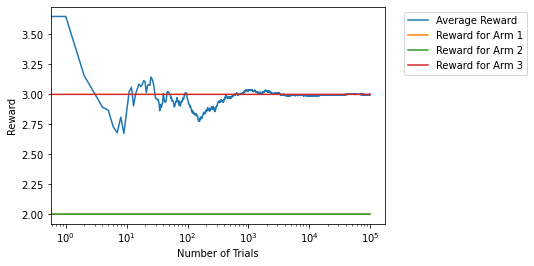

	Arm 1 :	M =  2.0 	Mean  =  2.0 	N =  0
	Arm 2 :	M =  2.0 	Mean  =  2.0 	N =  0
	Arm 3 :	M =  3.0 	Mean  =  2.998515201712585 	N =  100000
[3.55821032 3.65056382 3.15653576 ... 2.99852922 2.99852624 2.9985152 ]


In [8]:
exp1 = greedy_experiment(2.0, 2.0, 3.0, 100000)
print(exp1)

# Epsilon Greedy Approach

In [9]:
def eps_greedy_experiment(m1, m2, m3, eps, N):
    actions = [Actions(m1,1), Actions(m2,2), Actions(m3,3)]
    data = np.empty(N)  
    for i in range(N):
    # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([a.mean for a in actions])
        x = actions[j].choose()
        actions[j].inc_update(x)
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    # plot moving average ctr
    plt.plot(cumulative_average,label='Average Reward')
    plt.plot(np.ones(N)*m1, label='Reward for Arm 1')
    plt.plot(np.ones(N)*m2, label='Reward for Arm 2')
    plt.plot(np.ones(N)*m3, label='Reward for Arm 3')
    plt.xscale('log')
    plt.xlabel('Number of Trials')
    plt.ylabel('Reward')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
    for a in actions:
        a.print()   
    return cumulative_average

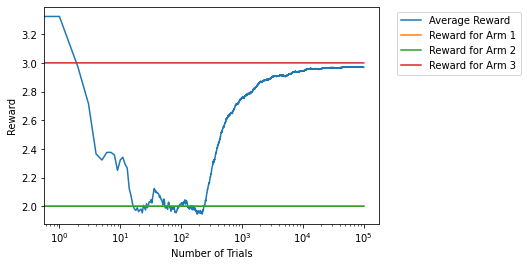

	Arm 1 :	M =  2.0 	Mean  =  2.005059189032082 	N =  1811
	Arm 2 :	M =  2.0 	Mean  =  2.0138232926919084 	N =  1804
	Arm 3 :	M =  3.0 	Mean  =  3.0046987753830443 	N =  96385
[2.94814908 3.32394744 2.97525252 ... 2.96872385 2.96871287 2.96871991]


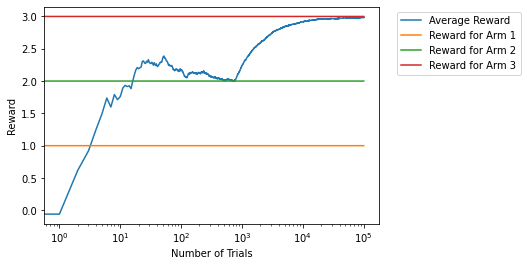

	Arm 1 :	M =  1.0 	Mean  =  1.023009100538804 	N =  326
	Arm 2 :	M =  2.0 	Mean  =  2.011696238151377 	N =  1096
	Arm 3 :	M =  3.0 	Mean  =  3.002177479753406 	N =  98578
[ 0.55871356 -0.0594552   0.61806075 ...  2.9848624   2.98487743
  2.98486972]


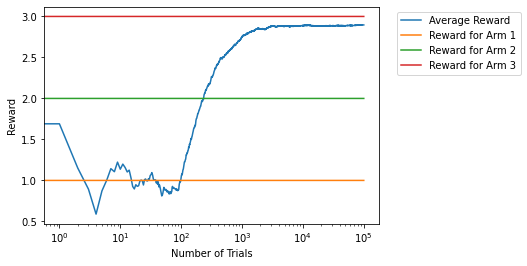

	Arm 1 :	M =  1.0 	Mean  =  1.0177634215863633 	N =  3395
	Arm 2 :	M =  2.0 	Mean  =  1.9839822983381779 	N =  3281
	Arm 3 :	M =  3.0 	Mean  =  2.9970186346188155 	N =  93324
[2.34431929 1.69037242 1.15145441 ... 2.89660339 2.89659546 2.8965852 ]


In [10]:
exp2 = eps_greedy_experiment(2.0, 2.0, 3.0, 0.05, 100000)
print(exp2)
exp3 = eps_greedy_experiment(1.0, 2.0, 3.0, 0.01, 100000)
print(exp3)
exp4 = eps_greedy_experiment(1.0, 2.0, 3.0, 0.1, 100000)
print(exp4)

# Incremental Approach

In [11]:
def inc_experiment(m1, m2, m3, N):
    actions = [Actions(m1,1), Actions(m2,2), Actions(m3,3)]
    data = np.empty(N)  
    for i in range(N):
    # epsilon greedy
        p = np.random.random()
        j = np.argmax([a.mean for a in actions])
        x = actions[j].choose()
        actions[j].inc_update(x)
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    # plot moving average ctr
    plt.plot(cumulative_average,label='Average Reward')
    plt.plot(np.ones(N)*m1, label='Reward for Arm 1')
    plt.plot(np.ones(N)*m2, label='Reward for Arm 2')
    plt.plot(np.ones(N)*m3, label='Reward for Arm 3')
    plt.xscale('log')
    plt.xlabel('Number of Trials')
    plt.ylabel('Reward')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
    for a in actions:
        a.print()   
    return cumulative_average

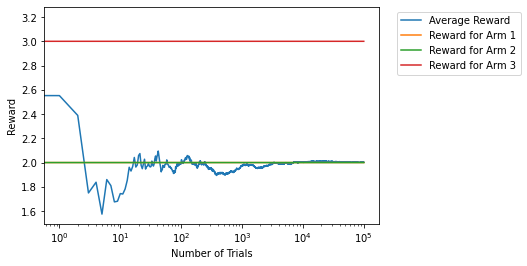

	Arm 1 :	M =  2.0 	Mean  =  1.2253968684980148 	N =  2
	Arm 2 :	M =  2.0 	Mean  =  2.002881091774521 	N =  99994
	Arm 3 :	M =  3.0 	Mean  =  1.7494041867344132 	N =  4
[3.20504067 2.55212413 2.38871871 ... 2.00287802 2.0028709  2.0028554 ]


In [12]:
exp5 = greedy_experiment(2.0, 2.0, 3.0, 100000)
print(exp5)

# UCB Approach

In [15]:
def ucb_experiment(m1, m2, m3, c, N):
    actions = [Actions(m1,1), Actions(m2,2), Actions(m3,3)]
    data = np.empty(N)  
    for i in range(N):
    # UCB
        p = np.random.random()
        j = np.argmax([a.mean+ c*math.sqrt(math.log(i+1)/(a.N+1))  for a in actions])
        x = actions[j].choose()
        actions[j].inc_update(x)
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    # plot moving average ctr
    plt.plot(cumulative_average,label='Average Reward')
    plt.plot(np.ones(N)*m1, label='Reward for Arm 1')
    plt.plot(np.ones(N)*m2, label='Reward for Arm 2')
    plt.plot(np.ones(N)*m3, label='Reward for Arm 3')
    plt.xscale('log')
    plt.xlabel('Number of Trials')
    plt.ylabel('Reward')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
    for a in actions:
        a.print()   
    return cumulative_average

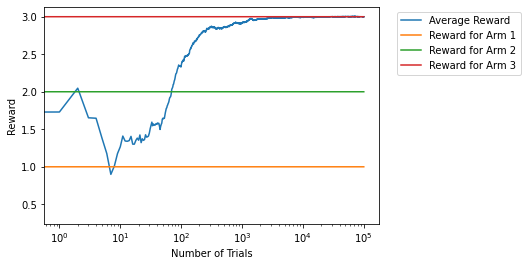

	Arm 1 :	M =  1.0 	Mean  =  0.8990655935302874 	N =  8
	Arm 2 :	M =  2.0 	Mean  =  1.6234843651777424 	N =  38
	Arm 3 :	M =  3.0 	Mean  =  3.000061928426768 	N =  99954
[0.36937489 1.73015496 2.04775204 ... 2.9993666  2.99936275 2.99937075]


In [16]:
exp_6 = ucb_experiment(1.0, 2.0, 3.0, 1, 100000)
print(exp_6)